In [ ]:
# conda install python=3.8
# pip install ultralytics
# pip install torch torchaudio --index-url https://download.pytorch.org/whl/cu118
# pip install torchvision --index-url https://download.pytorch.org/whl/cu118


In [26]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import easyocr

In [3]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
testmodel = YOLO("yolov8n.pt")

# Display model information (optional)
testmodel.info()

testmodel = testmodel.train(data="data.yaml", epochs=30, imgsz=512)

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Ultralytics 8.3.50  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

train: Scanning C:\Users\Claudio\Documents\VehicularSystems\svs-project\datasets\dataset\train\labels.cache... 5368 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5368/5368 [00:00<?, ?it/s]
val: Scanning C:\Users\Claudio\Documents\VehicularSystems\svs-project\datasets\dataset\val\labels.cache... 823 images, 1 backgrounds, 0 corrupt: 100%|██████████| 824/824 [00:00<?, ?it/s]


Plotting labels to runs\detect\train16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs\detect\train16
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.37G      1.839      4.897      1.488         35        512:   5%|▌         | 18/336 [00:14<04:19,  1.22it/s]


KeyboardInterrupt: 

In [27]:
model = YOLO("yolo_pytorch/best.pt")
reader = easyocr.Reader(["en"], gpu=True)
#metrics = model.val()


0: 512x512 1 Plate, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 512)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.6483], device='cuda:0')
data: tensor([[114.0020, 265.5907, 180.6685, 300.3267,   0.6483,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (512, 512)
shape: torch.Size([1, 6])
xywh: tensor([[147.3353, 282.9587,  66.6665,  34.7360]], device='cuda:0')
xywhn: tensor([[0.2878, 0.5527, 0.1302, 0.0678]], device='cuda:0')
xyxy: tensor([[114.0020, 265.5907, 180.6685, 300.3267]], device='cuda:0')
xyxyn: tensor([[0.2227, 0.5187, 0.3529, 0.5866]], device='cuda:0')


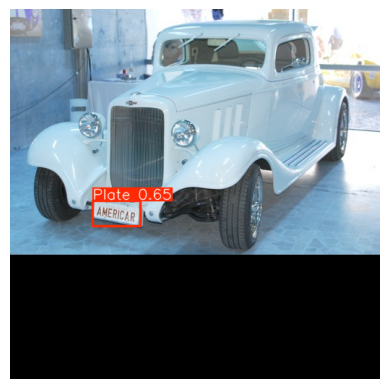

tensor([114.0020, 265.5907, 180.6685, 300.3267], device='cuda:0')


In [37]:
img = cv2.imread("datasets/dataset/test/images/0bd1ab4f429100ca.jpg")
results = model(img)
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    if boxes:
        plate = img[int(boxes.xyxy[0][1].item()) : int(boxes.xyxy[0][3].item()), int(boxes.xyxy[0][0].item()) : int(boxes.xyxy[0][2].item())] #(int(boxes.xyxy[0][0].item() * rescaling_factor), int(boxes.xyxy[0][1].item() * rescaling_factor)), (int((boxes.xyxy[0][2].item() * rescaling_factor)), int((boxes.xyxy[0][3].item() * rescaling_factor)))
        plate_reading = reader.readtext(plate)
        #print(plate_reading[0][1])
        class_names = {
            0: "???"
        }
        if plate_reading:
            class_names = {
                0: plate_reading[0][1]
            }
        print(boxes)
        annotated_image = result.plot()
        plt.imshow(annotated_image)
        plt.axis("off")
        plt.show()
        #cv2.rectangle(img, (int(boxes.xyxy[0][0].item()), int(boxes.xyxy[0][1].item())), (int((boxes.xyxy[0][2].item())), int((boxes.xyxy[0][3].item()))), (255, 0, 0), 2)
        print(boxes.xyxy[0])
    #masks = result.masks  # Masks object for segmentation masks outputs
    #keypoints = result.keypoints  # Keypoints object for pose outputs
    #probs = result.probs  # Probs object for classification outputs
    #obb = result.obb  # Oriented boxes object for OBB outputs
    #result.show()  # display to screen
    #img=result.plot()
    #cv2.imshow("img", img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    #result.save(filename="result.jpg")  # save to disk
#cv2.imshow("zsdfhsfdtbrsb", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [1]:
import torch, torchvision
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torchvision.__version__)

True
11.8
90100
0.19.1+cu118


In [1]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

image_path = "carla_images/plate.png"
reader = easyocr.Reader(["en"], gpu=True)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [3]:
result = reader.readtext(image_path)
print(result)


[([[12, 8], [72, 8], [72, 32], [12, 32]], 'CARLA', 0.9531406570737907)]


: 